# CLV and CLV Prediction

**Reference:** *https://www.kaggle.com/code/mehmeteryilmazz/clv-and-clv-prediction*

### Importing the Required Class and Making an Instance

In [86]:
from CLV_Analysis.Models.CLTV import CLTVModel

In [87]:

# Instantiate the CLTVModel class
cltv_model = CLTVModel()

### 1. Connecting to DB
### 2. Deriving Data

In [88]:

# Load data from the SQLite database
cltv_model.load_data()


,sales_id,date,customer_id,transaction_id,product_category,SKU,quantity,unit_price
0,1,2021-06-05,1098,0,Clothing,4C555,4,44.96
1,2,2021-06-05,1098,0,Beauty,25F7D,10,90.25
2,3,2021-06-05,1098,0,Industrial,805A9,13,62.01
3,4,2021-06-05,1098,0,Automotive,E5CE6,12,1.26
4,5,2019-12-24,592,1,Electronics,6C804,11,48.97
...,...,...,...,...,...,...,...,...
12060,12061,2004-12-18,1945,3998,Garden,565D6,2,80.28
12061,12062,2004-12-18,1945,3998,Movies,EBB51,1,85.29
12062,12063,2004-12-18,1945,3998,Games,F3DF3,18,36.95
12063,12064,2014-07-13,1310,3999,Home,70967,12,9.78


### 3. Trying to understand the data.

In [89]:

# Check the loaded data
cltv_model.check_data()


################### Shape ####################
(12065, 8)
#################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12065 entries, 0 to 12064
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales_id          12065 non-null  int64  
 1   date              12065 non-null  object 
 2   customer_id       12065 non-null  int64  
 3   transaction_id    12065 non-null  int64  
 4   product_category  12065 non-null  object 
 5   SKU               12065 non-null  object 
 6   quantity          12065 non-null  int64  
 7   unit_price        12065 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 754.2+ KB
None
################### Nunique ###################
sales_id            12065
date                 3206
customer_id          2186
transaction_id       4000
product_category       22
SKU                  4582
quantity               19
unit_price       

### **What is Customer Lifetime Value(CLV)?**

***The monetary value a customer will bring to a company during their relationship and communication is known as "customer lifetime value."***

This will be achieved by using the formulas below:

* **Repeat rate:** number of customers who make multiple purchases / all customers

* **Churn rate:** 1 - repeat rate

* **Purchase frequency:** total transactions / total number of unique customers

* **Average order value:** total price / total transactions

* **Customer value:** average order value * purchase frequency

* **Profit margin:** total price * profit margin rate(provided by the company)

* **CLV** = (customer value / churn rate) * profit margin

*Customers are segmented based on the generated CLV value, and operations are carried out according to these segments.*

#### **Dataset Details**

* **sale_id**: Unique Sale ID Number for each Respective Sale

* **date**: Date of Sales Transaction

* **customer_id**: Unique Customer iID for each Customer

* **transaction_id**: ID of the Transaction

* **product_category**: Product Category Name

* **SKU**: Product Code

* **quantity**: Number of Items Sold in the Transaction

* **unit_price** : Unit Price of the Respective Product

In [90]:

# Calculate sales amount for each transaction
cltv_model.calculate_sales_amount().head()


,sales_id,date,customer_id,transaction_id,product_category,SKU,quantity,unit_price,sales_amount
0,1,2021-06-05,1098,0,Clothing,4C555,4,44.96,179.84
1,2,2021-06-05,1098,0,Beauty,25F7D,10,90.25,902.50
2,3,2021-06-05,1098,0,Industrial,805A9,13,62.01,806.13
3,4,2021-06-05,1098,0,Automotive,E5CE6,12,1.26,15.12
4,5,2019-12-24,592,1,Electronics,6C804,11,48.97,538.67


In [91]:

# Calculate customer summary
cltv_model.calculate_customer_summary().head()


,total_transactions,total_sales_amount
customer_id,,
0,2,2709.35
1,1,3405.42
2,1,1679.49
3,2,3427.36
4,4,10040.15


In [92]:

# Calculate average order value
cltv_model.calculate_average_order_value().head()


,total_transactions,total_sales_amount,average_order_value
customer_id,,,
0,2,2709.35,1354.6750
1,1,3405.42,3405.4200
2,1,1679.49,1679.4900
3,2,3427.36,1713.6800
4,4,10040.15,2510.0375


In [93]:

# Calculate purchase frequency
cltv_model.calculate_purchase_frequency().head()


,total_transactions,total_sales_amount,average_order_value,purchase_frequency
customer_id,,,,
0,2,2709.35,1354.6750,0.000915
1,1,3405.42,3405.4200,0.000457
2,1,1679.49,1679.4900,0.000457
3,2,3427.36,1713.6800,0.000915
4,4,10040.15,2510.0375,0.001830


In [94]:

# Calculate repeat rate
cltv_model.calculate_repeat_rate()


0.5315645013723697

In [95]:

# Calculate churn rate
cltv_model.calculate_churn_rate()


0.46843549862763034

In [96]:

# Calculate profit margin
cltv_model.calculate_profit_margin().head()


,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin
customer_id,,,,,
0,2,2709.35,1354.6750,0.000915,270.935
1,1,3405.42,3405.4200,0.000457,340.542
2,1,1679.49,1679.4900,0.000457,167.949
3,2,3427.36,1713.6800,0.000915,342.736
4,4,10040.15,2510.0375,0.001830,1004.015


In [97]:

# Calculate customer value
cltv_model.calculate_customer_value().head()


,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin,customer_value
customer_id,,,,,,
0,2,2709.35,1354.6750,0.000915,270.935,1.239410
1,1,3405.42,3405.4200,0.000457,340.542,1.557832
2,1,1679.49,1679.4900,0.000457,167.949,0.768294
3,2,3427.36,1713.6800,0.000915,342.736,1.567868
4,4,10040.15,2510.0375,0.001830,1004.015,4.592932


In [98]:

# Calculate CLTV
cltv_tb= cltv_model.calculate_cltv()
cltv_tb.head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin,customer_value,clv
customer_id,,,,,,,
0,2,2709.35,1354.6750,0.000915,270.935,1.239410,716.853264
1,1,3405.42,3405.4200,0.000457,340.542,1.557832,1132.508338
2,1,1679.49,1679.4900,0.000457,167.949,0.768294,275.457682
3,2,3427.36,1713.6800,0.000915,342.736,1.567868,1147.148103
4,4,10040.15,2510.0375,0.001830,1004.015,4.592932,9844.200393


In [99]:
# Creating the Segments
# Dividing the CLTV values into 4 parts and creating a segment variable.
cltv_model.create_segments(customer_summary_pr=cltv_tb).head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin,customer_value,clv,segment
customer_id,,,,,,,,
36,5,13330.71,2666.142000,0.002287,1333.071,6.098220,17354.280186,A
1366,7,13066.54,1866.648571,0.003202,1306.654,5.977374,16673.287849,A
1963,5,13005.09,2601.018000,0.002287,1300.509,5.949263,16516.832608,A
1184,5,12743.08,2548.616000,0.002287,1274.308,5.829405,15858.016395,A
1247,5,12728.07,2545.614000,0.002287,1272.807,5.822539,15820.680266,A


In [100]:
# Display the summary of segments
cltv_model.display_segments_summary(customer_summary_pr=cltv_tb)

total_transactions             total_sales_amount                    \
                      mean count   sum               mean count         sum   
segment                                                                       
D                 1.140768   547   624         680.135302   547   372034.01   
C                 1.401099   546   765        1792.840183   546   978890.74   
B                 1.917582   546  1047        3118.802784   546  1702866.32   
A                 2.859232   547  1564        5647.929945   547  3089417.68   

        average_order_value                     purchase_frequency  ...  \
                       mean count           sum               mean  ...   
segment                                                             ...   
D                623.429741   547  3.410161e+05           0.000522  ...   
C               1454.845449   546  7.943456e+05           0.000641  ...   
B               1902.861523   546  1.038962e+06           0.000877  ...   
A               2137.336455   547  1.169123e+06           0.001308  ...   

                  profit_margin                   customer_value        \
              sum          mean count         sum           mean count   
segment                                                                  
D        0.285453     68.013530   547   37203.401       0.311132   547   
C        0.349954    179.284018   546   97889.074       0.820146   546   
B        0.478957    311.880278   546  170286.632       1.426717   546   
A        0.715462    564.792995   547  308941.768       2.583683   547   

                              clv                      
                 sum         mean count           sum  
segment                                                
D         170.189392    57.456097   547  3.142849e+04  
C         447.799973   323.702829   546  1.767417e+05  
B         778.987338   969.540470   546  5.293691e+05  
A        1413.274328  3385.184838   547  1.851696e+06  

[4 rows x 21 columns]

### **CLV Prediction with BG-NBD and Gamma-Gamma**

***CLTV Prediction: BG/NBD Gamma gamma submodel***

Hereby, performing CLTV prediction with BG/NBD and Gamma-Gamma.

#### Expected Number of Transactions with BG/NBD.

BG/NBD is used as a standalone sales prediction model, that is; it predicts the expected number of purchases per customer.

**The information we need to use in this model and learn from the customer is:**

* **frequency:** Number of repeated purchases by the customer (more than 1) (frequency)

* **recency:** Time between a customer's first and last purchase

* **T:** Time since the customer's first purchase (customer's age)

In [101]:

# Calculate CLTV prediction data
cltv_model.calculate_cltv_pr().head()


,recency,T,frequency,monetary
customer_id,,,,
0,3340,3796,2,1354.6750
1,0,8654,1,3405.4200
2,0,8594,1,1679.4900
3,1689,5891,2,1713.6800
4,3941,6511,4,2510.0375


In [102]:

# Fit the BG-NBD model
cltv_model.fit_bgf_model()


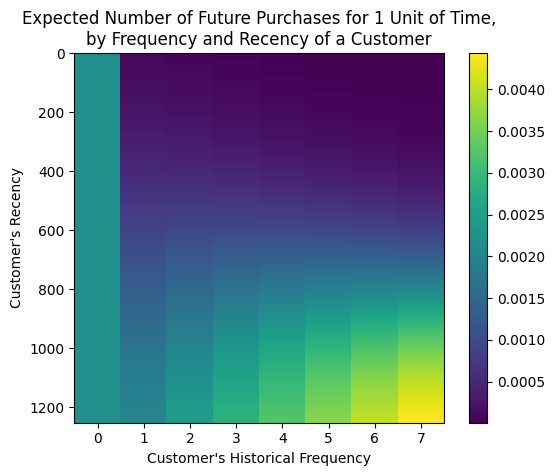

In [103]:

# Plot frequency-recency matrix
cltv_model.plot_frequency_recency_matrix()


Here we can see that our best customers who bought from us at least 2 times and their lastest purchase was when they were around 550 weeks old. The oldest customers which are mainly in the top right corner bought quickly and "disappeard". 

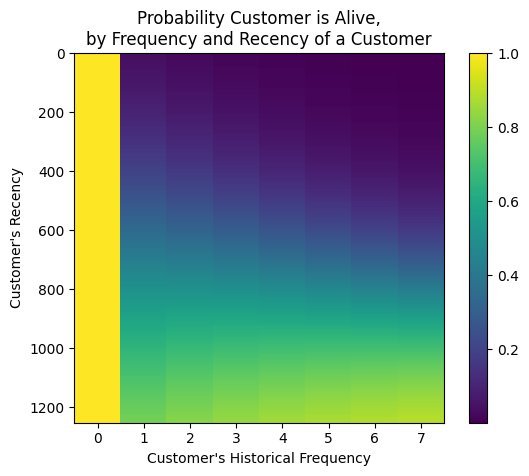

In [104]:

# Plot probability alive matrix
cltv_model.plot_probability_alive_matrix()


So we can see that the customers who have "disappeared" have less probability to be alive.

#### Ranking customers from best to worst

Let's return to our customers and rank them from "highest expected purchases in the next period" to lowest. Models expose a method that will predict a customer's expected purchases in the next period using their history.

In [105]:

# Predict purchases
cltv_model.predict_purchases().tail()


,recency,T,frequency,monetary,predicted_purchases
customer_id,,,,,
891,241.285714,281.571429,3,2034.890000,0.004426
1646,611.285714,660.714286,5,2138.866000,0.004562
1366,678.857143,830.000000,7,1866.648571,0.004574
2591,440.142857,457.000000,4,1982.552500,0.004651
66,125.142857,154.714286,3,1537.083333,0.004846


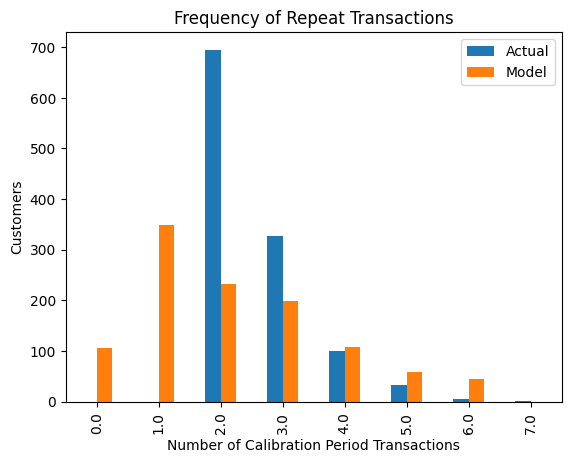

In [106]:

# Plot period transactions
cltv_model.plot_period_transactions()


## Estimating Customers' Lifetime Value

We can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.

In [107]:

# Fit the Gamma-Gamma model
cltv_model.fit_ggf_model()


In [108]:

# Calculate expected average profit
cltv_model.calculate_expected_average_profit().head()


,recency,T,frequency,monetary,predicted_purchases,expected_average_profit
customer_id,,,,,,
1278,457.142857,598.714286,2,3928.580,0.002893,4461.315176
2749,257.714286,375.000000,2,3848.400,0.003309,4370.299541
2666,103.857143,850.285714,2,3629.345,0.000535,4121.641148
2108,375.000000,911.571429,2,3588.965,0.001227,4075.804140
2650,47.428571,477.714286,2,3572.110,0.001535,4056.671332


In [109]:
# Calculate CLTV prediction for 3 months
cltv_model.calculate_cltv_prediction(time_period =3, discount_rate=0.01/4).head()

,customer_id,clv
0,0,64.188974
1,3,24.387114
2,4,78.009128
3,6,34.329718
4,8,28.160002


In [110]:

# Calculate CLTV prediction for 12 months
cltv_model.calculate_cltv_prediction().head()


,customer_id,clv
0,0,238.722615
1,3,90.866954
2,4,290.853756
3,6,128.141673
4,8,104.839967


In [111]:

# Merge CLTV predictions with other variables
cltv_model.merge_cltv_predictions().head()


,customer_id,recency,T,frequency,monetary,predicted_purchases,expected_average_profit,clv
0,0,477.142857,542.285714,2,1354.6750,0.003229,1539.569127,238.722615
1,3,241.285714,841.571429,2,1713.6800,0.000969,1947.090555,90.866954
2,4,563.000000,930.142857,4,2510.0375,0.002261,2669.760600,290.853756
3,6,639.285714,1230.428571,2,2058.6150,0.001135,2338.640543,128.141673
4,8,395.571429,701.285714,2,888.0300,0.002159,1009.861082,104.839967


In [112]:

# Create segments based on CLTV
cltv_model.create_segments().head()


,customer_id,recency,T,frequency,monetary,predicted_purchases,expected_average_profit,clv,segment
1060,2749,257.714286,375.000000,2,3848.400,0.003309,4370.299541,693.354346,A
153,338,276.428571,292.714286,2,2961.825,0.003881,3363.911581,625.303408,A
654,1631,364.285714,385.285714,2,3112.985,0.003659,3535.499550,620.250362,A
516,1278,457.142857,598.714286,2,3928.580,0.002893,4461.315176,620.238336,A
967,2518,261.285714,283.142857,2,2825.805,0.003884,3209.509651,596.892855,A


In [113]:

# Display segments summary
cltv_model.display_segments_summary()


customer_id                   recency                       \
                mean count     sum        mean count            sum   
segment                                                               
D        1422.065292   291  413821  296.358370   291   86240.285714   
C        1460.448276   290  423530  514.137931   290  149100.000000   
B        1488.617241   290  431699  610.382759   290  177011.000000   
A        1528.608247   291  444825  639.648994   291  186137.857143   

                  T                      frequency  ...       monetary  \
               mean count            sum      mean  ...            sum   
segment                                             ...                  
D        987.391262   291  287330.857143  2.319588  ...  344735.682000   
C        914.664039   290  265252.571429  2.472414  ...  385069.875167   
B        863.874384   290  250523.571429  2.634483  ...  458615.694833   
A        774.767305   291  225457.285714  2.817869  ...  606320.023738   

        predicted_purchases                 expected_average_profit        \
                       mean count       sum                    mean count   
segment                                                                     
D                  0.000919   291  0.267431             1330.201549   291   
C                  0.001813   290  0.525829             1484.388883   290   
B                  0.002442   290  0.708097             1758.636001   290   
A                  0.003069   291  0.892963             2304.166396   291   

                               clv                      
                   sum        mean count           sum  
segment                                                 
D        387088.650619   42.643789   291  12409.342672  
C        430472.776050  112.034271   290  32489.938652  
B        510004.440147  192.297229   290  55766.196446  
A        670512.421254  330.591328   291  96202.076554  

[4 rows x 24 columns]